Data Collection

About Dataset

This dataset has data from 2014-2016 data for different commodities purchased across the state of Maharashtra.

Columns


1.APMC : Agricultural Produce Marketing Committee. It is a categorical variable. Places of different APMC are in it.

2.Commodity : Names of commodities grown. Categorical.

3.Year : Year of collection of the commodity at APMC.

4.Month : Month of collection.

5.arrivals_in_qtl : Quantity if commodity collected in quintals.

6.min_price : Minimum price for the commodity.

7.max_price : Maximum price for the commodity.

8.modal_price : Target variable. Price given to farmers.

9.date : Date of collection.

10district_name : Name of the district of APMC.

11.state_name : Name of state. Considering only for Maharashtra, so all values are Maharashtra.


# 1.Read the dataset to the python environment.


In [96]:
import pandas as pd
data1=pd.read_csv(r'C:\Users\ANJU SAJI\Downloads\Monthly_data_cmo.csv (1).zip')
data1

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
0,Ahmednagar,Bajri,2015,April,79,1406,1538,1463,2015-04,Ahmadnagar,Maharashtra
1,Ahmednagar,Bajri,2016,April,106,1788,1925,1875,2016-04,Ahmadnagar,Maharashtra
2,Ahmednagar,Wheat(Husked),2015,April,1253,1572,1890,1731,2015-04,Ahmadnagar,Maharashtra
3,Ahmednagar,Wheat(Husked),2016,April,387,1750,2220,1999,2016-04,Ahmadnagar,Maharashtra
4,Ahmednagar,Sorgum(Jawar),2015,April,3825,1600,2200,1900,2015-04,Ahmadnagar,Maharashtra
...,...,...,...,...,...,...,...,...,...,...,...
62424,Shrigonda,GRAM,2016,November,586,5700,6367,6200,2016-11,Ahmadnagar,Maharashtra
62425,Shrigonda,GREEN GRAM,2016,November,2,5000,5000,5000,2016-11,Ahmadnagar,Maharashtra
62426,Shrigonda,BLACK GRAM,2016,November,46,4700,6933,6400,2016-11,Ahmadnagar,Maharashtra
62427,Shrigonda,SOYBEAN,2016,November,166,2583,2708,2633,2016-11,Ahmadnagar,Maharashtra


In [97]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62429 entries, 0 to 62428
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   APMC             62429 non-null  object
 1   Commodity        62429 non-null  object
 2   Year             62429 non-null  int64 
 3   Month            62429 non-null  object
 4   arrivals_in_qtl  62429 non-null  int64 
 5   min_price        62429 non-null  int64 
 6   max_price        62429 non-null  int64 
 7   modal_price      62429 non-null  int64 
 8   date             62429 non-null  object
 9   district_name    62429 non-null  object
 10  state_name       62429 non-null  object
dtypes: int64(5), object(6)
memory usage: 5.2+ MB


In [98]:
data1.describe()

,Year,arrivals_in_qtl,min_price,max_price,modal_price
count,62429.000000,6.242900e+04,6.242900e+04,6.242900e+04,62429.000000
mean,2015.337503,6.043088e+03,2.945228e+03,3.688814e+03,3296.003989
std,0.690451,3.470331e+04,1.318396e+04,7.662962e+03,3607.792534
min,2014.000000,1.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2015.000000,3.800000e+01,1.250000e+03,1.600000e+03,1450.000000
50%,2015.000000,2.110000e+02,1.976000e+03,2.797000e+03,2425.000000
75%,2016.000000,1.364000e+03,3.900000e+03,4.647000e+03,4257.000000
max,2016.000000,1.450254e+06,3.153038e+06,1.600090e+06,142344.000000


In [99]:
data1.shape

(62429, 11)

# 2 pre-processing steps.

# 2.1  checking null value

In [100]:
data1.isnull().sum()

APMC               0
Commodity          0
Year               0
Month              0
arrivals_in_qtl    0
min_price          0
max_price          0
modal_price        0
date               0
district_name      0
state_name         0
dtype: int64

In [101]:
## there is no missing value in this data

In [102]:
data1.nunique()

APMC                 349
Commodity            352
Year                   3
Month                 12
arrivals_in_qtl    11169
min_price           8503
max_price           9739
modal_price         9327
date                  27
district_name         33
state_name             1
dtype: int64

In [103]:
## 3 categories in Year.
data1['Year'].value_counts()

2016    28971
2015    25557
2014     7901
Name: Year, dtype: int64

In [105]:
# Which year is highest in terms of modal_price.
data1[['arrivals_in_qtl','min_price','max_price','modal_price']].groupby(data1["Year"]).sum().sort_values(by="modal_price",ascending=False)

,arrivals_in_qtl,min_price,max_price,modal_price
Year,,,,
2016,167763619,86826086,111944031,99608865
2015,159554268,76236512,91808885,82570880
2014,49946074,20805015,26536030,23586488


# checking the outliers

<AxesSubplot:>

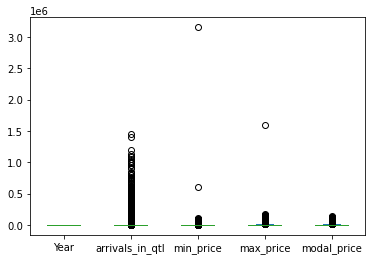

In [106]:
data1.plot(kind='box')

In [107]:
##From the boxplot the outliers are clearly visible in arrivals_in_qtl,min_price,max_price,modal_price

In [108]:
# to handle outliers in arrivals_in_qtl

import numpy as np
Q1 = np.percentile(data1['arrivals_in_qtl'],25,interpolation='midpoint')
Q3 = np.percentile(data1['arrivals_in_qtl'],75,interpolation='midpoint')
IQR = Q3-Q1
print('Interquartile range is', IQR)
low_limit=Q1-1.5*IQR
high_limit=Q3+1.5*IQR
print('low_limit is', low_limit)
print('up_limit is', high_limit)

Interquartile range is 1326.0
low_limit is -1951.0
up_limit is 3353.0


In [109]:
index=data1['arrivals_in_qtl'][(data1['arrivals_in_qtl']<low_limit)|(data1['arrivals_in_qtl']>high_limit)].index
data1.drop(index,inplace=True)

In [110]:
## to handle outliers in min_price

import numpy as np
Q1 = np.percentile(data1['min_price'],25,interpolation='midpoint')
Q3 = np.percentile(data1['min_price'],75,interpolation='midpoint')
IQR = Q3-Q1
print('Interquartile range is', IQR)
low_limit=Q1-1.5*IQR
high_limit=Q3+1.5*IQR
print('low_limit is', low_limit)
print('up_limit is', high_limit)

Interquartile range is 2698.0
low_limit is -2747.0
up_limit is 8045.0


In [111]:
index=data1['min_price'][(data1['min_price']<low_limit)|(data1['min_price']>high_limit)].index
data1.drop(index,inplace=True)

In [112]:
## to handle outliers in  max_price


import numpy as np
Q1 = np.percentile(data1['max_price'],25,interpolation='midpoint')
Q3 = np.percentile(data1['max_price'],75,interpolation='midpoint')
IQR = Q3-Q1
print('Interquartile range is', IQR)
low_limit=Q1-1.5*IQR
high_limit=Q3+1.5*IQR
print('low_limit is', low_limit)
print('up_limit is', high_limit)

Interquartile range is 2866.0
low_limit is -2704.0
up_limit is 8760.0


In [113]:
index=data1['min_price'][(data1['max_price']<low_limit)|(data1['max_price']>high_limit)].index
data1.drop(index,inplace=True)

In [114]:
##to handle outliers in modal_price

import numpy as np
Q1 = np.percentile(data1['modal_price'],25,interpolation='midpoint')
Q3 = np.percentile(data1['modal_price'],75,interpolation='midpoint')
IQR = Q3-Q1
print('Interquartile range is', IQR)
low_limit=Q1-1.5*IQR
high_limit=Q3+1.5*IQR
print('low_limit is', low_limit)
print('up_limit is', high_limit)

Interquartile range is 2550.0
low_limit is -2375.0
up_limit is 7825.0


In [115]:
index=data1['modal_price'][(data1['modal_price']<low_limit)|(data1['modal_price']>high_limit)].index
data1.drop(index,inplace=True)

<AxesSubplot:>

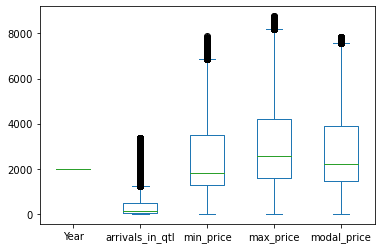

In [116]:
data1.plot(kind='box')

In [117]:
data1.dtypes

APMC               object
Commodity          object
Year                int64
Month              object
arrivals_in_qtl     int64
min_price           int64
max_price           int64
modal_price         int64
date               object
district_name      object
state_name         object
dtype: object

# 2.2 Encoding

In [118]:
## one hot encoding

data1=pd.get_dummies(data1,columns=['Year'])
data1.head()

,APMC,Commodity,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name,Year_2014,Year_2015,Year_2016
0,Ahmednagar,Bajri,April,79,1406,1538,1463,2015-04,Ahmadnagar,Maharashtra,0,1,0
1,Ahmednagar,Bajri,April,106,1788,1925,1875,2016-04,Ahmadnagar,Maharashtra,0,0,1
2,Ahmednagar,Wheat(Husked),April,1253,1572,1890,1731,2015-04,Ahmadnagar,Maharashtra,0,1,0
3,Ahmednagar,Wheat(Husked),April,387,1750,2220,1999,2016-04,Ahmadnagar,Maharashtra,0,0,1
5,Ahmednagar,Sorgum(Jawar),April,2093,1695,2454,2119,2016-04,Ahmadnagar,Maharashtra,0,0,1


In [119]:
import category_encoders as ce

In [120]:
encoder= ce.BaseNEncoder(cols=['APMC','Commodity','district_name'],return_df=True,base=3)

In [121]:
data1.head()

,APMC,Commodity,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name,Year_2014,Year_2015,Year_2016
0,Ahmednagar,Bajri,April,79,1406,1538,1463,2015-04,Ahmadnagar,Maharashtra,0,1,0
1,Ahmednagar,Bajri,April,106,1788,1925,1875,2016-04,Ahmadnagar,Maharashtra,0,0,1
2,Ahmednagar,Wheat(Husked),April,1253,1572,1890,1731,2015-04,Ahmadnagar,Maharashtra,0,1,0
3,Ahmednagar,Wheat(Husked),April,387,1750,2220,1999,2016-04,Ahmadnagar,Maharashtra,0,0,1
5,Ahmednagar,Sorgum(Jawar),April,2093,1695,2454,2119,2016-04,Ahmadnagar,Maharashtra,0,0,1


In [122]:
pd.set_option('display.max_columns',None)

In [123]:
## to fit and transform the data

data1_encoded=encoder.fit_transform(data1)
data1_encoded.head()

,APMC_0,APMC_1,APMC_2,APMC_3,APMC_4,APMC_5,Commodity_0,Commodity_1,Commodity_2,Commodity_3,Commodity_4,Commodity_5,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name_0,district_name_1,district_name_2,district_name_3,state_name,Year_2014,Year_2015,Year_2016
0,0,0,0,0,0,1,0,0,0,0,0,1,April,79,1406,1538,1463,2015-04,0,0,0,1,Maharashtra,0,1,0
1,0,0,0,0,0,1,0,0,0,0,0,1,April,106,1788,1925,1875,2016-04,0,0,0,1,Maharashtra,0,0,1
2,0,0,0,0,0,1,0,0,0,0,0,2,April,1253,1572,1890,1731,2015-04,0,0,0,1,Maharashtra,0,1,0
3,0,0,0,0,0,1,0,0,0,0,0,2,April,387,1750,2220,1999,2016-04,0,0,0,1,Maharashtra,0,0,1
5,0,0,0,0,0,1,0,0,0,0,1,0,April,2093,1695,2454,2119,2016-04,0,0,0,1,Maharashtra,0,0,1


In [124]:
##dropping unwanted columns

data1_encoded=data1_encoded.drop(['Month','state_name'],axis=1)

In [125]:
data1_encoded.dtypes

APMC_0              int64
APMC_1              int64
APMC_2              int64
APMC_3              int64
APMC_4              int64
APMC_5              int64
Commodity_0         int64
Commodity_1         int64
Commodity_2         int64
Commodity_3         int64
Commodity_4         int64
Commodity_5         int64
arrivals_in_qtl     int64
min_price           int64
max_price           int64
modal_price         int64
date               object
district_name_0     int64
district_name_1     int64
district_name_2     int64
district_name_3     int64
Year_2014           uint8
Year_2015           uint8
Year_2016           uint8
dtype: object

In [126]:
data1_encoded['date']=pd.to_datetime(data1_encoded['date'])

In [127]:
data1_encoded.head()

,APMC_0,APMC_1,APMC_2,APMC_3,APMC_4,APMC_5,Commodity_0,Commodity_1,Commodity_2,Commodity_3,Commodity_4,Commodity_5,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name_0,district_name_1,district_name_2,district_name_3,Year_2014,Year_2015,Year_2016
0,0,0,0,0,0,1,0,0,0,0,0,1,79,1406,1538,1463,2015-04-01,0,0,0,1,0,1,0
1,0,0,0,0,0,1,0,0,0,0,0,1,106,1788,1925,1875,2016-04-01,0,0,0,1,0,0,1
2,0,0,0,0,0,1,0,0,0,0,0,2,1253,1572,1890,1731,2015-04-01,0,0,0,1,0,1,0
3,0,0,0,0,0,1,0,0,0,0,0,2,387,1750,2220,1999,2016-04-01,0,0,0,1,0,0,1
5,0,0,0,0,0,1,0,0,0,0,1,0,2093,1695,2454,2119,2016-04-01,0,0,0,1,0,0,1


# scaling

In [128]:
data1_encoded.describe()

,APMC_0,APMC_1,APMC_2,APMC_3,APMC_4,APMC_5,Commodity_0,Commodity_1,Commodity_2,Commodity_3,Commodity_4,Commodity_5,arrivals_in_qtl,min_price,max_price,modal_price,district_name_0,district_name_1,district_name_2,district_name_3,Year_2014,Year_2015,Year_2016
count,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000
mean,0.323584,0.661382,0.964811,0.809000,0.912724,0.957232,0.010385,0.169288,0.521179,0.616239,0.837778,1.127832,434.456925,2518.195916,3091.000922,2820.794969,0.219082,0.835771,0.897034,0.827926,0.130474,0.410614,0.458912
std,0.467848,0.826404,0.802609,0.789335,0.806117,0.779264,0.101376,0.471898,0.738271,0.762540,0.769271,0.834411,679.713121,1781.338440,1926.575827,1845.320987,0.413628,0.900435,0.795764,0.782291,0.336828,0.491950,0.498314
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,1265.000000,1574.000000,1446.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,126.000000,1820.000000,2571.000000,2223.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,510.000000,3508.000000,4225.000000,3901.000000,0.000000,2.000000,2.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3353.000000,7892.000000,8760.000000,7825.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000


In [129]:
## scalar
data1_min_max_scaled=data1_encoded.copy()
columns=['arrivals_in_qtl','min_price','max_price','modal_price']
##
for column in columns:
    data1_min_max_scaled[column] = (data1_min_max_scaled[column] - data1_min_max_scaled[column].min()) / (data1_min_max_scaled[column].max() - data1_min_max_scaled[column].min()) 
    
##
                                                                                                      
data1_min_max_scaled.head()

,APMC_0,APMC_1,APMC_2,APMC_3,APMC_4,APMC_5,Commodity_0,Commodity_1,Commodity_2,Commodity_3,Commodity_4,Commodity_5,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name_0,district_name_1,district_name_2,district_name_3,Year_2014,Year_2015,Year_2016
0,0,0,0,0,0,1,0,0,0,0,0,1,0.023270,0.178155,0.175571,0.186965,2015-04-01,0,0,0,1,0,1,0
1,0,0,0,0,0,1,0,0,0,0,0,1,0.031325,0.226559,0.219749,0.239617,2016-04-01,0,0,0,1,0,0,1
2,0,0,0,0,0,1,0,0,0,0,0,2,0.373508,0.199189,0.215753,0.221214,2015-04-01,0,0,0,1,0,1,0
3,0,0,0,0,0,1,0,0,0,0,0,2,0.115155,0.221744,0.253425,0.255463,2016-04-01,0,0,0,1,0,0,1
5,0,0,0,0,0,1,0,0,0,0,1,0,0.624105,0.214774,0.280137,0.270799,2016-04-01,0,0,0,1,0,0,1


# 3. Exploratory Data Analysis

# Univariate Analysis


In [130]:
## histogram
data2 = data1[['arrivals_in_qtl','min_price','max_price','modal_price']]

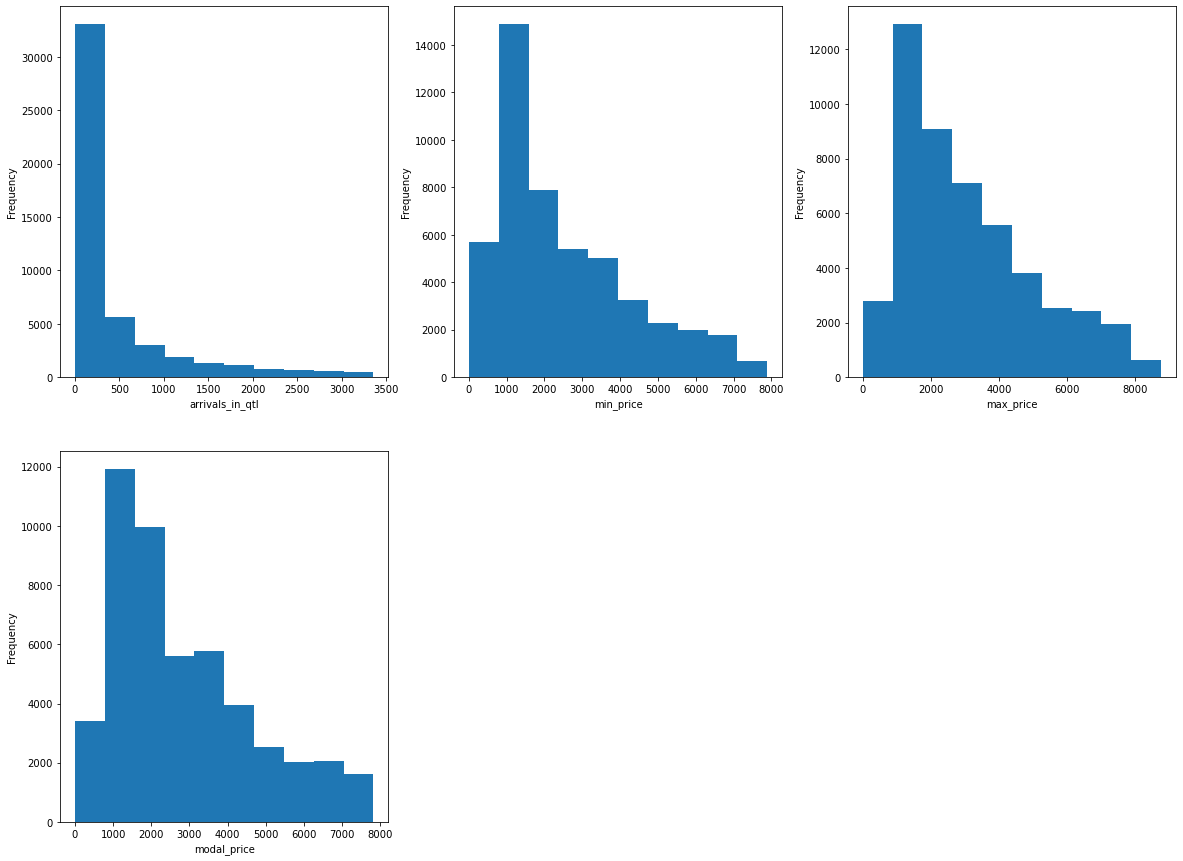

In [131]:
import matplotlib.pyplot as plt
import numpy as py
plt.figure(figsize=(20,15))
for i in range(4):
    plt.subplot(2,3,i+1)
    plt.hist(data1[data2.columns[i]])
    plt.xlabel(data2.columns[i])
    plt.ylabel('Frequency')

<AxesSubplot:>

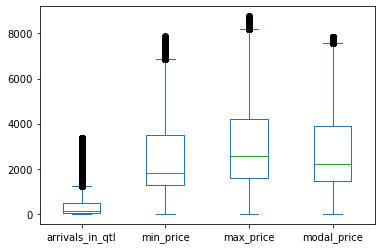

In [132]:
## box plot

data2.plot(kind='box')

# Bivariate Analysis

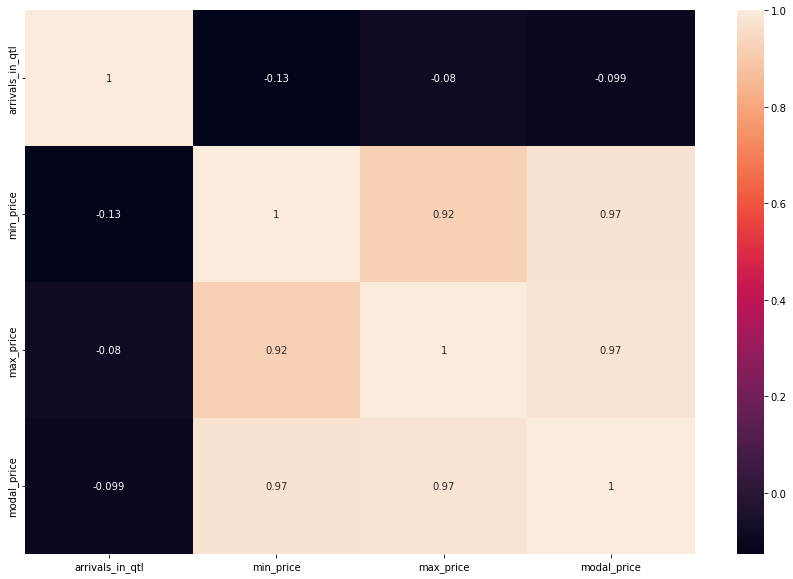

In [133]:
# heatmap of the data for checking the correlation

import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(data2.corr(),annot=True)
plt.show()

# 4.Modelling

In [134]:
##assign dependent and independent variable

x=data1_min_max_scaled.drop(['modal_price','date'],axis=1)
y=data1_min_max_scaled['modal_price']

In [135]:

## Splilting the dataset

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)


# linear regression

In [136]:
## to fit the model

from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)

In [137]:
## Predicting the values

y_pred=lr.predict(x_test)

In [138]:
## Checking the MSE and r2_score


from sklearn.metrics import mean_squared_error,r2_score
print("MSE is: ",mean_squared_error(y_test,y_pred))
print("r squared:",r2_score(y_test,y_pred))

MSE is:  0.0007190638690214207
r squared: 0.9872817388926115


In [139]:
temp=[]
temp.append(["Linear Regression",round(mean_squared_error(y_test,y_pred),5),round(r2_score(y_test,y_pred),5)])


In [140]:
## Checking the y_test
y_test[0:5]

6775     0.178914
10202    0.469521
58181    0.570990
8369     0.202939
36694    0.203834
Name: modal_price, dtype: float64

In [141]:
## Checking the y_pred
y_pred[0:5]

array([0.17554806, 0.45950326, 0.56511326, 0.1997121 , 0.20814715])

# SVR

In [142]:
from sklearn.svm import SVR

# Choose regression method and set hyperparameter
svr_rbf=SVR(C=1.0, epsilon=0.2, kernel='rbf')

# Training of the regression model
svr_rbf.fit(x_train, y_train)
y_pred = svr_rbf.predict(x_test)

In [143]:
print("MSE is: ",mean_squared_error(y_test,y_pred))
print("r squared:",r2_score(y_test,y_pred))

MSE is:  0.009361494479260685
r squared: 0.8344209238260769


In [144]:
temp.append(["SVR",round(mean_squared_error(y_test,y_pred),5),round(r2_score(y_test,y_pred),5)])

# RandomForestRegressor

In [145]:
from sklearn.ensemble import RandomForestRegressor
rm=RandomForestRegressor()
rm.fit(x_train,y_train)

y_pred=rm.predict(x_test)

In [146]:
print("MSE is: ",mean_squared_error(y_test,y_pred))
print("r squared:",r2_score(y_test,y_pred))

MSE is:  0.0005106164799645569
r squared: 0.9909685995949667


In [147]:
temp.append(["RandomForestRegressor",round(mean_squared_error(y_test,y_pred),5),round(r2_score(y_test,y_pred),5)])

# DecisionTreeRegressor

In [148]:
from sklearn.tree import DecisionTreeRegressor

# Build decision tree
tree=DecisionTreeRegressor()
tree.fit(x_train,y_train)
y_pred=tree.predict(x_test)

In [149]:
print("MSE is: ",mean_squared_error(y_test,y_pred))
print("r squared:",r2_score(y_test,y_pred))

MSE is:  0.0009148059436826036
r squared: 0.9838196002391552


In [150]:
temp.append(["DecisionTreeRegressor",round(mean_squared_error(y_test,y_pred),5),round(r2_score(y_test,y_pred),5)])


In [151]:
df8 = pd.DataFrame(temp, columns = ['Algorithms', 'MSE','r2_score'])

In [152]:
df8.sort_values(by=['MSE','r2_score'])

,Algorithms,MSE,r2_score
2,RandomForestRegressor,0.00051,0.99097
0,Linear Regression,0.00072,0.98728
3,DecisionTreeRegressor,0.00091,0.98382
1,SVR,0.00936,0.83442


better algorithm for this problem is RandomForestRegressor	since it has lowest MSE and highest r2_score

# Model Fine Tuning

In [153]:
## Using gridsearch to find the best parameters

from sklearn.model_selection import GridSearchCV

param_grid = {  'bootstrap': [True,False], 'max_features': ['auto', 'log2','sqrt'], 'n_estimators': [100,150]}


In [154]:
g_search = GridSearchCV(estimator = rm, param_grid = param_grid,cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

In [155]:
## Fitting and printing the best parameters

g_search.fit(x_train, y_train);
print(g_search.best_params_)

{'bootstrap': True, 'max_features': 'auto', 'n_estimators': 100}


In [156]:
rm=RandomForestRegressor(bootstrap=True, max_features='auto',n_estimators=150)
rm.fit(x_train,y_train)

y_pred=rm.predict(x_test)


In [157]:
## slight improvement
print("MSE is: ",mean_squared_error(y_test,y_pred))
print("r squared:",r2_score(y_test,y_pred))

MSE is:  0.000506335404681264
r squared: 0.9910443200359721


MSE value is decreased and r2_score value has increased.